#### 
NAME  : RAHINI DEVI S
    
ROLLNO: 225229129

### SMA_Lab-1 : Real time crawling of tweets from Twitter and creating a network of user mentions

### Step 1: Install and import tweepy library

In [1]:
import tweepy as tw
import numpy as np
import pandas as pd

### Step 2: Sign up your twitter developer account and obtain the following credentials 

### Step 3: Using the above credentials get yourself authorized to stream real time tweets using the code snippet below

### Step 4: Using the API object search tweets of your interest using a particular hashtag

In [2]:
df = pd.read_csv('sample.csv',encoding = 'iso-8859-1',names=['target','id','date','query','name','text'])
df.head()

,target,id,date,query,name,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [45]:
data = df[['text','target']][799991:800011]

In [46]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


data['cleanText']=data['text'].map(lambda s:preprocess(s)) 

In [47]:
data.head()

,text,target,cleanText
799991,@iaintnohomo Banana will be playing later. BU...,0,iaintnohomo banana playing later shell playing...
799992,@koolgirl37 read my tweet below,0,koolgirl read tweet
799993,My life http://mattf.ca/2009/06/24/yay-me/,0,life
799994,Tried to get the mutant Fawkes to follow me bu...,0,tried get mutant fawkes follow lonely without ...
799995,Sick Spending my day laying in bed listening ...,0,sick spending day laying bed listening taylors...


### Step 6: Import the networkx package

In [48]:
import networkx as nx

### Step 7: First create a basic network with few nodes and edges

In [49]:
G = nx.from_pandas_edgelist(data,'cleanText', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

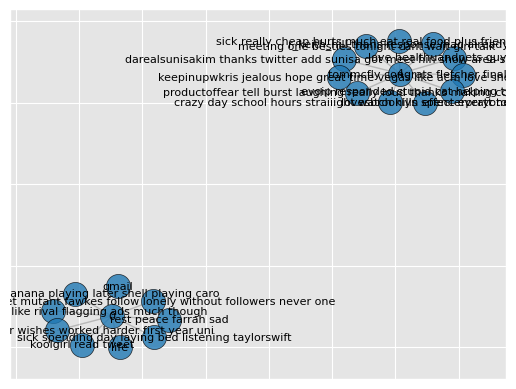

In [50]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)